In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [2]:
dataset = pd.read_csv("SMSSpamCollection",sep='\t',names=['labels','message'])
df =pd.DataFrame(dataset)

In [3]:
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
unique_values=df['labels'].unique()


In [7]:
unique_values

array(['ham', 'spam'], dtype=object)

In [8]:
df['labels']=df['labels'].map({'ham':0,'spam':1})

In [9]:
df

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

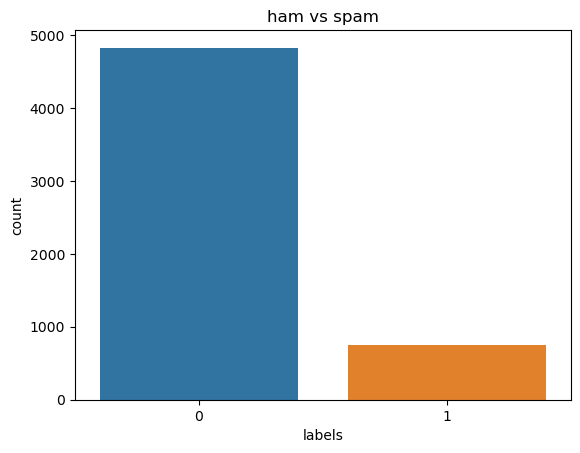

In [11]:
sns.countplot(data=df,x='labels')
plt.title('ham vs spam')
plt.show()




## clearly see that dataset is imbalanced

In [12]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the DataFrame
X_resampled, y_resampled = oversampler.fit_resample(df.drop(columns=['labels']), df['labels'])

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after oversampling
count = df_resampled['labels'].value_counts()
print(count)


0    4825
1    4825
Name: labels, dtype: int64


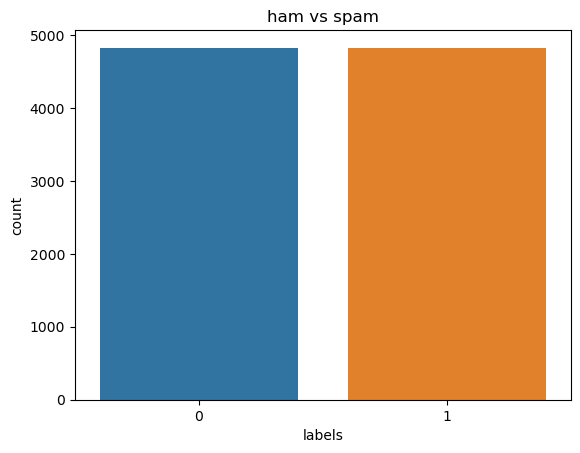

In [13]:
sns.countplot(data=df_resampled,x='labels')
plt.title('ham vs spam')
plt.show()

In [14]:
df_resampled["word_count"] = df_resampled["message"].apply(lambda x: len(x.split()))
df_resampled

,message,labels,word_count
0,"Go until jurong point, crazy.. Available only ...",0,20
1,Ok lar... Joking wif u oni...,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,U dun say so early hor... U c already then say...,0,11
4,"Nah I don't think he goes to usf, he lives aro...",0,13
...,...,...,...
9645,**FREE MESSAGE**Thanks for using the Auction S...,1,23
9646,Ur HMV Quiz cash-balance is currently £500 - t...,1,19
9647,07732584351 - Rodger Burns - MSG = We tried to...,1,33
9648,PRIVATE! Your 2003 Account Statement for 07808...,1,21


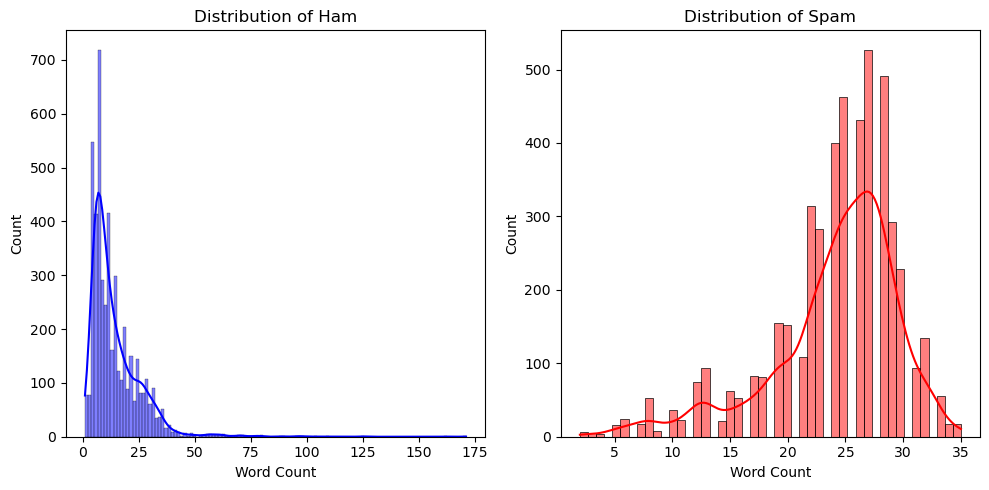

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom colors
ham_color = 'blue'
spam_color = 'red'

# Create a subplot with two histograms
plt.figure(figsize=(10, 5))

# Histplot for 'ham' labels
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.histplot(df_resampled[df_resampled['labels'] == 0]['word_count'], kde=True, color=ham_color)
plt.title('Distribution of Ham')
plt.xlabel('Word Count')
plt.ylabel('Count')

# Histplot for 'spam' labels
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.histplot(df_resampled[df_resampled['labels'] == 1]['word_count'], kde=True, color=spam_color)
plt.title('Distribution of Spam')
plt.xlabel('Word Count')
plt.ylabel('Count')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


### Most Saw spam fall in 20 to 30 words .Ham will fall in 5 to 15 words
  

In [16]:
def currency(data):
    currency_symbol = ['$','€','£','¥','₹','₽','₱','฿','₺','₴','₪','₨','₣','₦','₢','₲','₵','₵','₥','₿']
    for i in currency_symbol:
        if i in data:
            return 1
    return 0

In [17]:
df_resampled['contain_current_symbol'] = df_resampled['message'].apply(currency)

In [18]:
df_resampled

,message,labels,word_count,contain_current_symbol
0,"Go until jurong point, crazy.. Available only ...",0,20,0
1,Ok lar... Joking wif u oni...,0,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,U dun say so early hor... U c already then say...,0,11,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...
9645,**FREE MESSAGE**Thanks for using the Auction S...,1,23,0
9646,Ur HMV Quiz cash-balance is currently £500 - t...,1,19,1
9647,07732584351 - Rodger Burns - MSG = We tried to...,1,33,0
9648,PRIVATE! Your 2003 Account Statement for 07808...,1,21,0


<Axes: xlabel='contain_current_symbol', ylabel='count'>

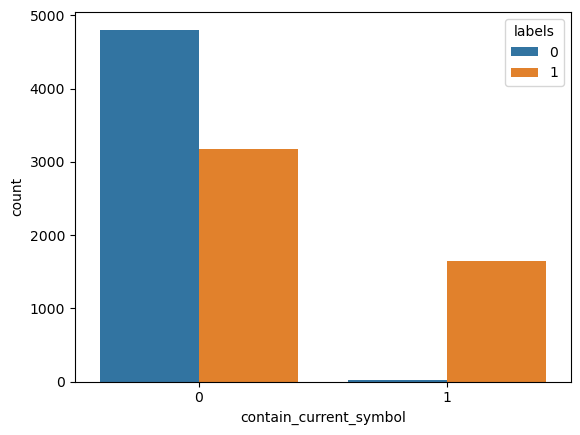

In [19]:
sns.countplot(data=df_resampled,x='contain_current_symbol',hue='labels')

#### we observed that spam contain 40%  current symbol

In [20]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i) <=57:
            return 1
    return 0 # 0 for ham.1 for spam

In [21]:
df_resampled['contain_numbers']=df_resampled['message'].apply(number)

In [22]:


df_resampled

,message,labels,word_count,contain_current_symbol,contain_numbers
0,"Go until jurong point, crazy.. Available only ...",0,20,0,0
1,Ok lar... Joking wif u oni...,0,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0,1
3,U dun say so early hor... U c already then say...,0,11,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0,0
...,...,...,...,...,...
9645,**FREE MESSAGE**Thanks for using the Auction S...,1,23,0,1
9646,Ur HMV Quiz cash-balance is currently £500 - t...,1,19,1,1
9647,07732584351 - Rodger Burns - MSG = We tried to...,1,33,0,1
9648,PRIVATE! Your 2003 Account Statement for 07808...,1,21,0,1


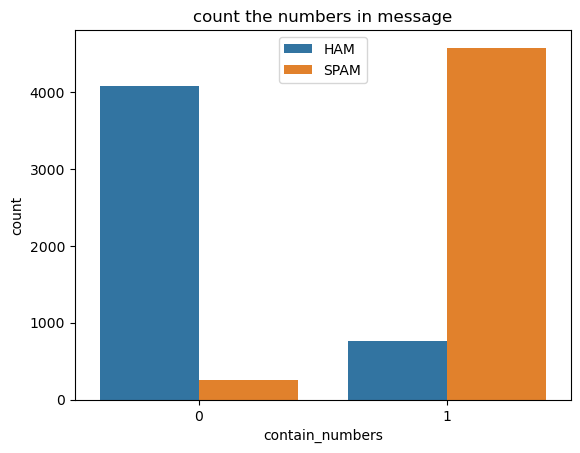

In [23]:
sns.countplot(data=df_resampled,x='contain_numbers',hue='labels')
plt.legend(labels=['HAM','SPAM'],loc=9)
plt.title('count the numbers in message')
plt.show()

### Data preprocessing

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Sample DataFrame column 'message' containing text
# df_resampled['message'] = ...

# Convert text to lowercase
df_resampled['message'] = df_resampled['message'].str.lower()

# Function to process text
def process_text(text):
    # Remove numbers and special characters
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Join the lemmatized words into a string
    return ' '.join(lemmatized_words)

# Apply the text processing function to the 'message' column
df_resampled['filtered_message'] = df_resampled['message'].apply(process_text)

# Print the result
print(df_resampled['filtered_message'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIJAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIJAY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
9645    free messagethanks using auction subscription ...
9646    ur hmv quiz cashbalance currently £ maximize u...
9647    rodger burn msg tried call reply sm free nokia...
9648    private account statement show unredeemed poin...
9649    dear xxxxxxx uve invited xchat final attempt c...
Name: filtered_message, Length: 9650, dtype: object


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df_resampled['filtered_message']
tfidf = TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
# Get feature names
feature_names = tfidf.get_feature_names_out()

x=pd.DataFrame(vectors,columns=feature_names)
y=df_resampled['labels']


In [26]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB

In [27]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
X_test

,access,account,admirer,age,already,also,always,amp,ampm,an,...,yeah,year,yes,yesterday,yet,yo,youre,yr,yup,zed
3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.301863,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)


In [30]:
dt_predictions

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       990
           1       0.96      1.00      0.98       940

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930


Naive Bayes Classifier Report:

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       990
           1       0.88      0.94      0.91       940

    accuracy                           0.91      1930
   macro avg       0.91      0.91      0.91      1930
weighted avg       0.91      0.91      0.91      1930

Decision Tree Confusion Matrix 
[[951  39]
 [  3 937]]


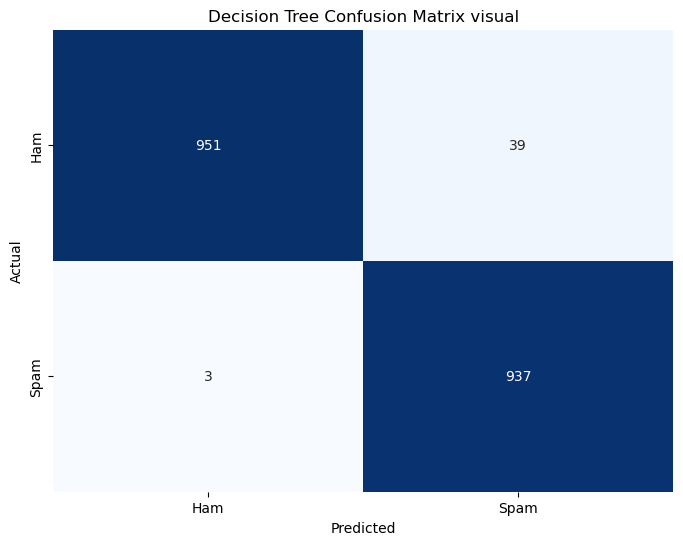

Naive Bayes Confusion Matrix visual
[[875 115]
 [ 61 879]]


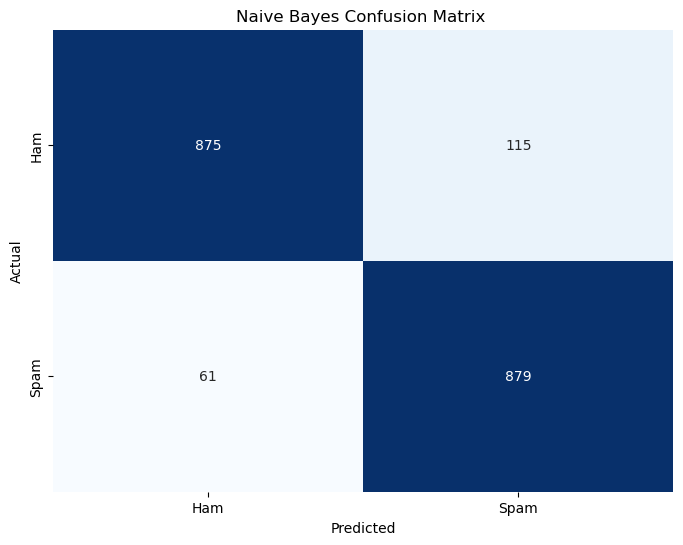

In [31]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

# Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
nb_predictions = naive_bayes.predict(X_test)




# Generate classification reports for both models
dt_report = classification_report(y_test, dt_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Print the classification reports
print("Decision Tree Classifier Report:")
print(dt_report)
print("\nNaive Bayes Classifier Report:")
print()
print(nb_report)


# Generate confusion matrices for both models
dt_confusion = confusion_matrix(y_test, dt_predictions)
nb_confusion = confusion_matrix(y_test, nb_predictions)
print("Decision Tree Confusion Matrix ")
print(dt_confusion)
# Create a heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Decision Tree Confusion Matrix visual" )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Naive Bayes Confusion Matrix visual")
print(nb_confusion)
# Create a heatmap for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Naive Bayes Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
print('Decision tree cross_value_sore')
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=5)
cv
print(round(cv.mean(),3))
print(round(cv.std(),3))

Decision tree cross_value_sore
0.941
0.005


In [35]:
print('Naive Bayes cross_val_score')
dt=DecisionTreeClassifier()
cv=cross_val_score(dt,x,y,scoring='f1',cv=5)
cv
print(round(cv.mean(),3))
print(round(cv.std(),3))

Naive Bayes cross_val_score
0.979
0.003


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_spam_or_ham(message):
    # Preprocess the message using the same preprocessing applied to the dataset
    processed_message = process_text(message)  # You can use the process_text function you defined earlier

    # Transform the processed message using the same TF-IDF vectorizer
    message_vector = tfidf.transform([processed_message]).toarray()

    # Predict using both model
    dt_prediction = decision_tree.predict(message_vector)
    

        
    if dt_prediction[0] == 0:
        return "Ham"
    else:
        return "Spam"
    

# Example usage:
message_to_predict = "Your mobile has won a prize! Claim now."
result = predict_spam_or_ham(message_to_predict)
print(f"The message is classified as: {result}")


The message is classified as: Spam


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_spam_or_ham(message):
    # Preprocess the message using the same preprocessing applied to the dataset
    processed_message = process_text(message)  # You can use the process_text function you defined earlier

    # Transform the processed message using the same TF-IDF vectorizer
    message_vector = tfidf.transform([processed_message]).toarray()

    # Predict using both model
    nb_prediction = naive_bayes.predict(message_vector)

        
    if nb_prediction[0] == 0:
        return "Ham"
    else:
        return "Spam"
    

# Example usage:
message_to_predict = "Your mobile has won a prize! Claim now."
result = predict_spam_or_ham(message_to_predict)
print(f"The message is classified as: {result}")


The message is classified as: Spam


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
